In [42]:
import math
import matplotlib.pyplot as plt
import numpy as np

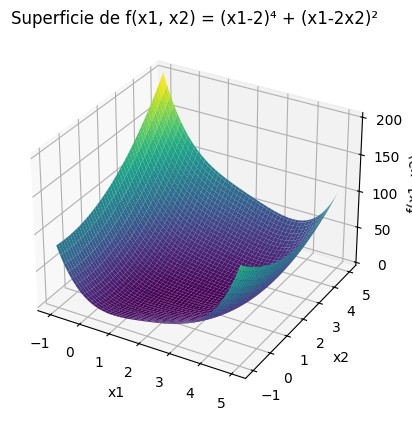

In [43]:
# Definir la función
def f(x1, x2):
  return (x1 - 2)**4 + (x1 - 2*x2)**2

# Generar datos para graficar
x1 = np.linspace(-1, 5, 100)
x2 = np.linspace(-1, 5, 100)
x1, x2 = np.meshgrid(x1, x2)
y = f(x1, x2)

# Graficar la superficie
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y, cmap='viridis')

# Etiquetas y título
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Superficie de f(x1, x2) = (x1-2)⁴ + (x1-2x2)²')

# Mostrar la gráfica
plt.show()

In [44]:
def golden_section_method(ak,bk,x,d):
  l = 0.01
  alpha = 0.618
  lambdak = ak + (1 - alpha) * (bk - ak)
  miuk = ak + alpha * (bk - ak)
  k = 1

  while bk - ak >= l:
    if function(x,lambdak,d) > function(x,miuk,d):
      ak = lambdak
      lambdak = miuk
      miuk = ak + alpha * (bk - ak)

    elif function(x,lambdak,d) <= function(x,miuk,d):
      bk = miuk
      miuk = lambdak
      lambdak = ak + (1 - alpha) * (bk - ak)

    k+= 1
    lambda_gsm = (lambdak+miuk)/2
  return lambda_gsm

In [45]:
def RosenbrockMethod(x, epsilon):
  """
  Implementa el método de Rosenbrock para optimización sin restricciones.
  """
  k = 1
  n = len(x)
  d = np.eye(n)  # Direcciones iniciales (matriz identidad)
  y = x.copy()
  
  # Inicialización de matrices
  a = np.zeros([n, n])
  b = np.zeros([n, n])
  temp = np.zeros([n, n])
  nD = np.zeros([n, n])
  stl = np.zeros(n)
  
  # Almacenar puntos de la trayectoria
  X = np.zeros([1, n])
  X[0] = x

  while True:
    # Búsqueda unidimensional en cada dirección
    for j in range(n):
      lambdaj = golden_section_method(-10, 10, y, d[j])
      stl[j] = lambdaj
      y = y + stl[j] * d[j]

    X = np.vstack([X, y])
    
    # Criterio de parada
    if np.linalg.norm(X[k] - X[k-1]) < epsilon or k == 10:
      break
    
    k += 1

    # Construcción de nuevas direcciones ortogonales
    for j in range(n):
      # Calcular vector a[j]
      if stl[j] == 0:
        a[j] = d[j]
      else:
        a[j] = np.sum([stl[i] * d[i] for i in range(j, n)], axis=0)

      # Calcular vector b[j] (ortogonalización de Gram-Schmidt)
      if j == 0:
        b[j] = a[j]
      else:
        temp[j] = np.sum([np.dot(nD[i], a[j]) * nD[i] for i in range(j)], axis=0)
        b[j] = a[j] - temp[j]

      # Normalizar para obtener nueva dirección
      nD[j] = b[j] / np.linalg.norm(b[j])

    # Actualizar direcciones
    d = nD.copy()
    
    # Reinicializar matrices
    a = np.zeros([n, n])
    b = np.zeros([n, n])
    temp = np.zeros([n, n])

  return (X, stl)

In [46]:
epsilon = 0.03
x = np.array([0, 3])

X = RosenbrockMethod(x, epsilon)
print(X)

(array([[0.        , 3.        ],
       [3.13052014, 1.56665363],
       [2.60940594, 1.23931328],
       [2.24678997, 1.12731499],
       [2.18807316, 1.09639795],
       [2.03998655, 1.0220127 ],
       [1.9800635 , 0.988359  ],
       [2.00953491, 1.00226441],
       [1.95771682, 0.98036636],
       [1.97640292, 0.99076779]]), array([-0.02126116,  0.00230722]))


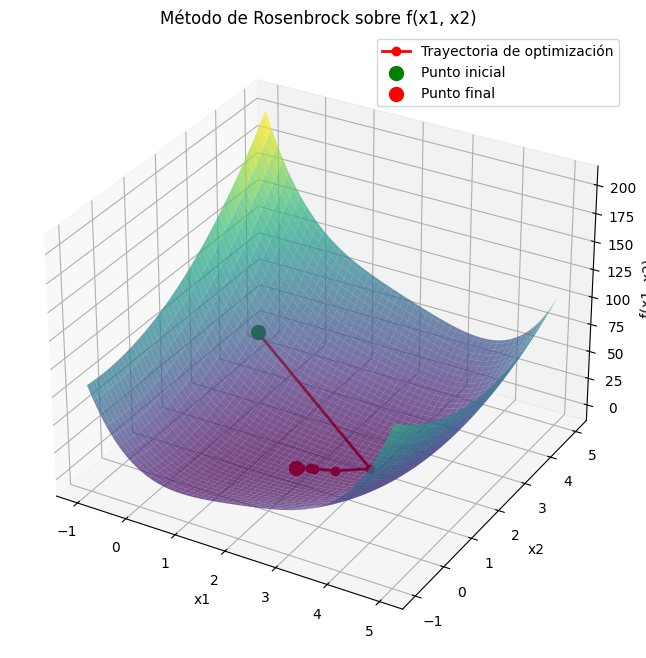

Punto inicial: (0.0000, 3.0000)
Punto final: (1.9764, 0.9908)
Valor de la función en el punto final: 0.000027


In [47]:
# Extraer las coordenadas de los puntos de la optimización
points = X[0]
x1_points = points[:, 0]
x2_points = points[:, 1]
y_points = f(x1_points, x2_points)

# Crear una figura solo con la vista 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
ax.plot_surface(x1, x2, y, cmap='viridis', alpha=0.7)

# Graficar la trayectoria de optimización
ax.plot(x1_points, x2_points, y_points, 'ro-', linewidth=2, markersize=6, label='Trayectoria de optimización')
ax.scatter(x1_points[0], x2_points[0], y_points[0], color='green', s=100, label='Punto inicial')
ax.scatter(x1_points[-1], x2_points[-1], y_points[-1], color='red', s=100, label='Punto final')

# Etiquetas y título
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Método de Rosenbrock sobre f(x1, x2)')
ax.legend()

plt.show()

print(f"Punto inicial: ({x1_points[0]:.4f}, {x2_points[0]:.4f})")
print(f"Punto final: ({x1_points[-1]:.4f}, {x2_points[-1]:.4f})")
print(f"Valor de la función en el punto final: {y_points[-1]:.6f}")
